In [92]:
FN_compare = [783, 733, 664, 619, 570, 519, 458, 393, 321, 255, 206, 153, 108, 74, 52, 28, 15, 10, 8, 8, 6, 6, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

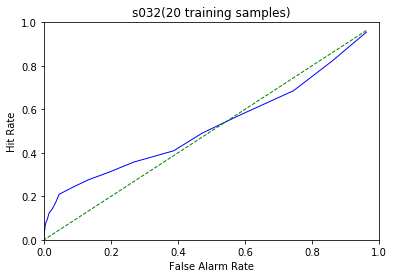

In [11]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

path = './result/pohmm_result/20_train/'
file = 's032_20train_verification_results_out.csv'
fileName = path + file

df = pd.read_csv(fileName)

#正样本
df_positive = df[df["genuine"]==True]
df_sort_positive = df_positive.sort_values(by=['score'])
df_95percent_positive = df_sort_positive[19:380]
mean = df_95percent_positive["score"].mean()
df_score_positive = df_sort_positive["score"]

distance_positive = list( map(lambda x: abs(x - mean), df_score_positive) )
distance_array_positive = np.array(distance_positive)

#负样本
df_negative = df[df["genuine"]==False]
df_sort_negative = df_negative.sort_values(by=['score'])
df_score_negative = df_sort_negative["score"]

distance_negative = list( map(lambda x: abs(x - mean), df_score_negative) )
distance_array_negative = np.array(distance_negative)

#判断函数
def judge(threshold,distance_array):
    out_num = np.sum((distance_array > threshold)) 
    return out_num

threshold_range = np.linspace(1,150,500)

FN = [0]*len(threshold_range)
TP = [0]*len(threshold_range)
FP = [0]*len(threshold_range)
TN = [0]*len(threshold_range)

false_alarm_rate = [0.0]*len(threshold_range)
miss_rate = [0.0]*len(threshold_range)
recall = [0.0]*len(threshold_range)
precision = [0.0]*len(threshold_range)

for i,threshold in enumerate(threshold_range):
    #print('threshold is:',threshold)
    
    out_num = judge(threshold,distance_positive)
    #print('out_num is:',out_num)
    out_num_all = judge(threshold,distance_array_negative)
    #print('out_num_all is:', out_num_all)
     
    FN[i] = out_num
    TP[i] = 400 - out_num
    FP[i] = 2500 -  out_num_all
    TN[i] = out_num_all

    false_alarm_rate[i] = FP[i]/(FP[i]+TN[i])
    miss_rate[i] = FN[i]/(TP[i]+FN[i])
    recall[i] = TP[i]/(TP[i]+FN[i])
    precision[i] = TP[i]/(TP[i]+FP[i])
    
#根据Kevin的定义：
False_Alarm_Rate = list( map(lambda x: x/400, FN) )
Miss_Rate = list( map(lambda x: x/2500, FP) )
Hit_Rate = list( map(lambda x: 1 - x, Miss_Rate) )
plt.plot(False_Alarm_Rate,Hit_Rate,color="blue",linewidth=1)
plt.plot(False_Alarm_Rate,False_Alarm_Rate,'g--',linewidth=1)

plt.title('s032(20 training samples)')
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [12]:

print('FN = ', FN)
print('TP = ', TP)
print('FP = ', FP)
print('TN = ', TN)

#print('FN = ', FN)

FN =  [385, 344, 298, 234, 189, 155, 107, 78, 53, 35, 18, 14, 10, 6, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
TP =  [15, 56, 102, 166, 211, 245, 293, 322, 347, 365, 382, 386, 390, 394, 396, 398, 399, 399, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400]
FP =  [113, 446, 786, 1066, 1273, 1476, 1607, 1721, 1810, 1892, 1977, 2068, 2142, 2192, 2260, 2308, 2356, 2380, 2394, 2413, 2424, 2435, 2446, 2452, 2457, 2461, 2465, 2468, 2475, 2483, 2491, 2495, 2499, 2499, 2499, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
TN =  [2387, 2054, 1714, 1434, 1227, 1024, 893, 779, 690, 608, 523, 432, 358, 308, 240, 192, 144, 120, 106, 87, 76, 65, 54, 48, 43, 39, 35, 32, 25, 17, 9, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
five_Percent_index = FN.index(18)

In [5]:
FP[five_Percent_index]/2500

0.7916

In [6]:
F1=[0.0]*len(TP)
for i in range(len(TP)):
    F1[i] = 2*TP[i]/(2*TP[i]+FP[i]+FN[i])

In [7]:
F1[five_Percent_index]

0.2767113364722926

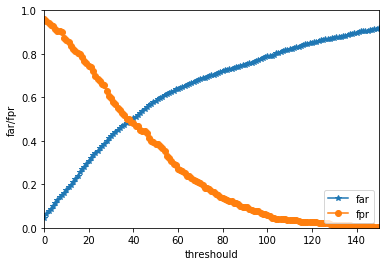

In [8]:
plt.figure()
plt.plot(false_alarm_rate,marker = '*', label = 'far')
plt.plot(miss_rate, marker = 'o', label = 'fpr')
plt.legend()
plt.xlim([0,150])
plt.ylim([0,1])
plt.xlabel('threshould')
plt.ylabel('far/fpr')
plt.show()

In [9]:
miss_rate[39]

0.4875

In [10]:
false_alarm_rate[39]

0.4972